In [2]:
import shutil
import glob
import tarfile
import os
import mne
import pandas as pd
import numpy as np
from tqdm import tqdm
import spkit as sp
import matplotlib.pyplot as plt
from directory_tree import display_tree
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
import numpy as np
from collections import Counter
from scipy.stats import ttest_ind
import seaborn as sns

In [3]:
# Get cognitive status

Cog_score = pd.read_csv("/workspace/brail_poc3/notebooks/Chen/TestCognitive.csv")
Cog_score = Cog_score.loc[:, ["ID", "Label"]]
Age_data = pd.read_csv("/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
Age_data = Age_data.loc[:, ["Subject", "Age"]]
Age_data = Age_data.rename({'Subject': 'ID'}, axis='columns')

def convert_age_range(age_range):
    # ハイフンで文字列を分割し、最初の部分を取得
    return int(age_range.split("-")[0])

Age_data["Age_1"] = Age_data["Age"].apply(convert_age_range)
Age_data.drop("Age", axis=1, inplace=True)

In [4]:
cog_df = Cog_score.merge(Age_data, on='ID', how='left')
ground_truth = cog_df[cog_df['Age_1'] >= 40]
Elder_group = ground_truth['ID'].tolist()

In [5]:
Elder_group

['sub-032383',
 'sub-032318',
 'sub-032331',
 'sub-032305',
 'sub-032308',
 'sub-032428',
 'sub-032333',
 'sub-032430',
 'sub-032301',
 'sub-032303',
 'sub-032329',
 'sub-032431',
 'sub-032335',
 'sub-032337',
 'sub-032306',
 'sub-032338',
 'sub-032340',
 'sub-032341',
 'sub-032442',
 'sub-032347',
 'sub-032343',
 'sub-032369',
 'sub-032372',
 'sub-032373',
 'sub-032443',
 'sub-032376',
 'sub-032374',
 'sub-032450',
 'sub-032454',
 'sub-032451',
 'sub-032377',
 'sub-032455',
 'sub-032456',
 'sub-032452',
 'sub-032458',
 'sub-032375',
 'sub-032459',
 'sub-032378',
 'sub-032453',
 'sub-032457',
 'sub-032379',
 'sub-032462',
 'sub-032380',
 'sub-032447',
 'sub-032393',
 'sub-032395',
 'sub-032392',
 'sub-032465',
 'sub-032466',
 'sub-032474',
 'sub-032475',
 'sub-032479',
 'sub-032463',
 'sub-032482',
 'sub-032483',
 'sub-032486',
 'sub-032487',
 'sub-032488',
 'sub-032485',
 'sub-032484',
 'sub-032489',
 'sub-032490',
 'sub-032491',
 'sub-032492',
 'sub-032494',
 'sub-032495',
 'sub-0324

In [28]:
FC = []
for i in glob.glob("/workspace/brail_poc3/experiments/FC_Result_231102/pli/*"):
    if i.split("/")[-1].split(".")[0] in Elder_group:
        Sub = {}
        Sub["ID"] = i.split("/")[-1].split(".")[0]
        Sub["pli"] = np.load(i, allow_pickle='TRUE')
        Sub["cog"] = int(ground_truth[ground_truth['ID'] == Sub["ID"]].loc[:, "Label"])
        
        FC.append(Sub)
FC_1 = [item for item in FC if item['cog'] == 1]
FC_2 = [item for item in FC if item['cog'] == 2]

In [29]:
for i,d in enumerate(FC_1):
    print(i, np.array(d["pli"]).shape)
# del FC_1[19]

0 (61, 61)
1 (61, 61)
2 (61, 61)
3 (61, 61)
4 (61, 61)
5 (61, 61)
6 (61, 61)
7 (61, 61)
8 (61, 61)
9 (61, 61)
10 (61, 61)
11 (61, 61)
12 (61, 61)
13 (61, 61)
14 (61, 61)
15 (61, 61)
16 (61, 61)
17 (61, 61)
18 (61, 61)
19 (61, 61)
20 (61, 61)
21 (61, 61)
22 (61, 61)
23 (61, 61)
24 (61, 61)
25 (61, 61)
26 (61, 61)
27 (61, 61)
28 (61, 61)
29 (61, 61)
30 (61, 61)
31 (61, 61)
32 (61, 61)
33 (61, 61)
34 (61, 61)
35 (61, 61)
36 (61, 61)
37 (61, 61)
38 (61, 61)


In [30]:
FC_1[0]["pli"]

array([[0.        , 0.13333333, 0.6       , ..., 0.36666667, 0.26666667,
        0.26666667],
       [0.13333333, 0.        , 0.46666667, ..., 0.16666667, 0.16666667,
        0.13333333],
       [0.6       , 0.46666667, 0.        , ..., 0.13333333, 0.3       ,
        0.33333333],
       ...,
       [0.36666667, 0.16666667, 0.13333333, ..., 0.        , 0.13333333,
        0.16666667],
       [0.26666667, 0.16666667, 0.3       , ..., 0.13333333, 0.        ,
        0.1       ],
       [0.26666667, 0.13333333, 0.33333333, ..., 0.16666667, 0.1       ,
        0.        ]])

39


39it [00:00, 180.47it/s]


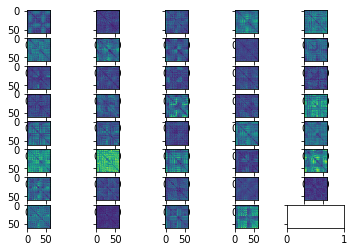

In [31]:
# cog = 1
PLI_len = len(FC_1)
fig, axs = plt.subplots(int(PLI_len/5+1), 5, sharey=True)
print(PLI_len)
# plt.subplots_adjust(top=1.7)
for index, sub_dir in tqdm(enumerate(FC_1)):
    PLI_Test = sub_dir["pli"]
    axs[int(index/5), index-5*(int(index/5))].imshow(PLI_Test, vmin=0, vmax=1)
        